# Comparison between Tokyo and Osaka with Data Science

# 1. Introduction
Tokyo and Osaka are the two largest cities in Japan. You can find a lot of information from internet or books which intoroduce landmarks, restaurants, shopping streets, parks and so on. But I decided to explore the cities with different approach by using data science. What are the characteristics of Japan's two major cities? Are Tokyo and Osaka similar or not? Could data scienc find Interesting discovery?

# 2. Business Problem
Data science has a potential to tell us what people won't be able to notice and what is not written in books or magazines. The aim of this project is to provide new insights to tourists who are interested in Japan or to travel agencies who publish books or provide information on the internet.

# 3. Data Description
Special Wards of Tokyo is a inner city of Tokyo Prefecture and has 23 districs, whereas Osaka city is a center of Osaka Prefecture and has 24 districs. I will use clustering analysis methodology for each district so it's convenient that two cities have simillar number of districs. In addition, below is basic comparison of Tokyo and Osaka, which could complement the results of data analysis (although I won't use these info in Python programming).

||Special Wards of Tokyo|Osaka City|
|:-|:-|:-|
|Population|9,659,769|2,750,812|
|Area|627.57km2|225.21km2|
|Population Density|15,392/km2|12,214/km2|
|Districts|23|24|

## 3.1 Data Source
For data source, names of all districs in Wards of Tokyo and Osaka city are necessary. Below Wikipedia pages provides the data as a table structure. There are so many informatin and data on these pages but the process for scraping is simplified thanks to Python BeautifulSoup library.

**Special Wards of Tokyo**  
https://en.wikipedia.org/wiki/Tokyo
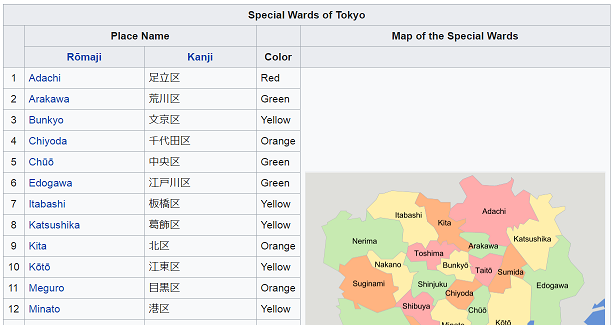

**Osaka city**  
https://en.wikipedia.org/wiki/Osaka

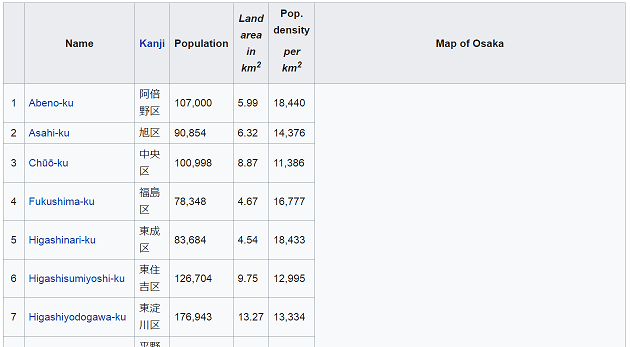

## 3.2 Data Processing Libraries
* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)  
BeautifulSoup is a Python library for pulling data out of HTML and XML files. In this project, this library is used for scraping district table from Wikipedia website.<P>

* [Geocoding](https://geocoder.readthedocs.io/providers/Google.html)
Geocoding is the process of converting addresses into geographic coordinates of latitude and longitude. In this project, this library is used for converting each district name into latitude and longitude. <P> 

* [Foursquare](https://foursquare.com/)
Foursquare is a technology company that build a massive dataset of accurate location data. Specific type of venues or stores around a given location can be searched by Foursquare API.  

# 4. Methodology

## 4.1 Scrape district data of Tokyo and Osaka
First, import necessary libraries.

In [2]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # general-purpose array-processing package
import requests # elegant and simple HTTP library
from bs4 import BeautifulSoup # library for pulling data out of HTML and XML files

Scrape districts table of Tokyo from Wikipedia and create pandas DataFrame. Confirmed **tokyo** DataFrame has 23 districs.

In [3]:
req = requests.get("https://en.wikipedia.org/wiki/Tokyo")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[3] # 4th table describes special wards of Tokyo
df = pd.read_html(str(table))
tokyo = pd.DataFrame(df[0])
tokyo = tokyo.iloc[:, 1]
tokyo = pd.DataFrame(tokyo)
tokyo.columns = ['District']
print(tokyo.shape)
tokyo.head()

(23, 1)


,District
0,Adachi
1,Arakawa
2,Bunkyo
3,Chiyoda
4,Chūō


Scrape districts table of Osaka from Wikipedia and create pandas DataFrame. Confirmed **osaka** DataFrame has 24 districs.

In [4]:
req = requests.get("https://en.wikipedia.org/wiki/Osaka")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[4] # 5th table describes wards of Osaka
df = pd.read_html(str(table))
osaka = pd.DataFrame(df[0])
osaka = osaka.iloc[:, 1]
osaka = pd.DataFrame(osaka)
osaka.columns = ['District']
print(osaka.shape)
osaka.head()

(24, 1)


,District
0,Abeno-ku
1,Asahi-ku
2,Chūō-ku
3,Fukushima-ku
4,Higashinari-ku


## 4.2 Get the list of latitude and longitude coordinates of a given district name

Import geocoder to convert district name to latitude and longitude.

In [5]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 98 kB 8.7 MB/s  eta 0:00:01


Get coordinates for each district in Tokyo, confirm **tokyo** DataFeame is updated with latitude and longitude coloumns.

In [6]:
lat_lng_coords = None
lati = []
longti = []
i = 0

# Repeated for each district name in tokyo DataFrame
for dist_name in tokyo['District']:
  # Repeated until
  while(lat_lng_coords is None):
    g = geocoder.arcgis('{}, Tokyo, Japan'.format(tokyo.loc[i, 'District']))
    lat_lng_coords = g.latlng

  #print('District = {0}, Latitude = {1}, Longtitude = {2}'.format(District, lat_lng_coords[0], lat_lng_coords[1]))
  lati.append(lat_lng_coords[0])
  longti.append(lat_lng_coords[1])
  i = i + 1
  lat_lng_coords = None

tokyo['Latitude'] = lati
tokyo['Longtitude'] = longti
tokyo.head()

,District,Latitude,Longtitude
0,Adachi,35.774811,139.804537
1,Arakawa,35.736093,139.783403
2,Bunkyo,35.707595,139.752210
3,Chiyoda,35.693930,139.753711
4,Chūō,35.670572,139.771988


Get coordinates for each district in Osaka, confirm **osaka** DataFeame is updated with latitude and longitude coloumns.

In [7]:
lat_lng_coords = None
lati = []
longti = []
i = 0

# Repeated for each district name in osaka DataFrame
for dist_name in osaka['District']:
  while(lat_lng_coords is None):
    g = geocoder.arcgis('{}, Osaka city, Osaka'.format(osaka.loc[i, 'District']))
    lat_lng_coords = g.latlng

  #print('District = {0}, Latitude = {1}, Longtitude = {2}'.format(District, lat_lng_coords[0], lat_lng_coords[1]))
  lati.append(lat_lng_coords[0])
  longti.append(lat_lng_coords[1])
  i = i + 1
  lat_lng_coords = None

osaka['Latitude'] = lati
osaka['Longtitude'] = longti
osaka.head()

,District,Latitude,Longtitude
0,Abeno-ku,34.638732,135.518467
1,Asahi-ku,34.721168,135.544269
2,Chūō-ku,34.681144,135.509884
3,Fukushima-ku,34.692308,135.472220
4,Higashinari-ku,34.669951,135.541270


## 4.3 Get a map of Tokyo & Osaka and add markers to the map

Import Nominatim and get geograpical coordinate of Special Wards of Tokyo and Osaka City. These are used as the center coordinates of Tokyo and Osaka. 

In [9]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode('Tokyo, Japan')
tokyo_latitude = location.latitude
tokyo_longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(tokyo_latitude, tokyo_longitude))
location = geolocator.geocode('Osaka city, Japan')
osaka_latitude = location.latitude
osaka_longitude = location.longitude
print('The geograpical coordinate of Osaka are {}, {}.'.format(osaka_latitude, osaka_longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.
The geograpical coordinate of Osaka are 34.6937569, 135.5014539.


Import folium. Folium is used for visualizing geospatial data.

In [10]:
!pip install folium
import folium

     |████████████████████████████████| 93 kB 4.5 MB/s  eta 0:00:01


Create the map of Tokyo/Osaka and add district marks to it.

In [11]:
tokyo_map = folium.Map(location=[tokyo_latitude, tokyo_longitude], zoom_start=11)

for dist, lat, lng in zip(tokyo['District'], tokyo['Latitude'], tokyo['Longtitude']):
    label = folium.Popup(dist, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tokyo_map)  
    
tokyo_map

In [12]:
osaka_map = folium.Map(location=[osaka_latitude, osaka_longitude], zoom_start=11)

for dist, lat, lng in zip(osaka['District'], osaka['Latitude'], osaka['Longtitude']):
    label = folium.Popup(dist, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(osaka_map)  
    
osaka_map

## 4.4 Explore each district and get venues information
Use Foursquare API to explore and get venues around districts. First define a function to get nearby venues.

In [15]:
# The code was removed by Watson Studio for sharing.

In [14]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# Function : getNearbyVenues
# name : 
# latitudes : 
# longitudes : 
# radius : 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call getNearbyVenues function and create a new DataFrame **tokyo_venue**.

In [16]:
tokyo_venues = getNearbyVenues(names=tokyo['District'], latitudes=tokyo['Latitude'], longitudes=tokyo['Longtitude'])
print(tokyo_venues.shape)
tokyo_venues.head()

Adachi
Arakawa
Bunkyo
Chiyoda
Chūō
Edogawa
Itabashi
Katsushika
Kita
Kōtō
Meguro
Minato
Nakano
Nerima
Ōta
Setagaya
Shibuya
Shinagawa
Shinjuku
Suginami
Sumida
Taitō
Toshima
(1524, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adachi,35.774811,139.804537,MEGA Don Quijote (MEGAドン・キホーテ 環七梅島店),35.778288,139.804967,Discount Store
1,Adachi,35.774811,139.804537,Ikinari Steak (いきなり!ステーキ),35.777730,139.802890,Steakhouse
2,Adachi,35.774811,139.804537,Nitori (ニトリ),35.778200,139.802592,Furniture / Home Store
3,Adachi,35.774811,139.804537,Yoshinoya (吉野家),35.773290,139.803560,Donburi Restaurant
4,Adachi,35.774811,139.804537,7-Eleven (セブンイレブン 足立梅島1丁目店),35.771822,139.803176,Convenience Store


Call getNearbyVenues function and create a new DataFrame **osaka_venue**.

In [17]:
osaka_venues = getNearbyVenues(names=osaka['District'], latitudes=osaka['Latitude'], longitudes=osaka['Longtitude'])
print(osaka_venues.shape)
osaka_venues.head()

Abeno-ku
Asahi-ku
Chūō-ku
Fukushima-ku
Higashinari-ku
Higashisumiyoshi-ku
Higashiyodogawa-ku
Hirano-ku
Ikuno-ku
Jōtō-ku
Kita-ku (administrative center)
Konohana-ku
Minato-ku
Miyakojima-ku
Naniwa-ku
Nishi-ku
Nishinari-ku
Nishiyodogawa-ku
Suminoe-ku
Sumiyoshi-ku
Taishō-ku
Tennōji-ku
Tsurumi-ku
Yodogawa-ku
(774, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abeno-ku,34.638732,135.518467,FamilyMart (ファミリーマート 松崎町店),34.639983,135.517041,Convenience Store
1,Abeno-ku,34.638732,135.518467,Royal Host (ロイヤルホスト 文の里店),34.637175,135.517652,Restaurant
2,Abeno-ku,34.638732,135.518467,甘辛や,34.638189,135.522473,Okonomiyaki Restaurant
3,Abeno-ku,34.638732,135.518467,FamilyMart (ファミリーマート 文の里二丁目店),34.636626,135.517734,Convenience Store
4,Abeno-ku,34.638732,135.518467,Gusto (ガスト 文の里店),34.639614,135.518109,Restaurant


New DataFrame generated by getNearbyVenues function has 7 columns shown above. Foursquare API searches for venues within a radius of 500 meters from specified district latitude and longitude. Maximum number of venues for one district are limited to 100.

## 4.5 Number of venues for Tokyo and Osaka

In [18]:
tokyo_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Adachi,21,21,21,21,21,21
Arakawa,16,16,16,16,16,16
Bunkyo,100,100,100,100,100,100
Chiyoda,100,100,100,100,100,100
Chūō,100,100,100,100,100,100
Edogawa,33,33,33,33,33,33
Itabashi,41,41,41,41,41,41
Katsushika,29,29,29,29,29,29
Kita,35,35,35,35,35,35


In [19]:
osaka_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Abeno-ku,22,22,22,22,22,22
Asahi-ku,15,15,15,15,15,15
Chūō-ku,64,64,64,64,64,64
Fukushima-ku,50,50,50,50,50,50
Higashinari-ku,30,30,30,30,30,30
Higashisumiyoshi-ku,16,16,16,16,16,16
Higashiyodogawa-ku,46,46,46,46,46,46
Hirano-ku,20,20,20,20,20,20
Ikuno-ku,11,11,11,11,11,11


In [36]:
print('Total number of venues in Tokyo is', len(tokyo_venues))
print('Total number of venues in Osaka is', len(osaka_venues))

Total number of venues in Tokyo is 1524
Total number of venues in Osaka is 774


The population density ratio between Tokyo and Osaka is 4 : 3 (15,392/km2 : 12,214/km2) whereas the number of venues ratio is 2 : 1 (1524 : 774). Moreover, the number of venue is reached the maximum of 100 in some districts in Tokyo, which means data shows how Tokyo's venues are densed.

## 4.6 Apply one-hot-encode to Venue Category
Venue Category in **tokyo_venues** and **osaka_venues** DataFrame is described as type of strings. These strings should be converted to numerical value as clustering algorithm can't take care of string data.

In [39]:
# one hot encoding
tokyo_onehot = pd.get_dummies(tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
tokyo_onehot['District'] = tokyo_venues['District']

# move district column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]
tokyo_onehot.head()

,District,ATM,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo
0,Adachi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adachi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adachi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adachi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adachi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# one hot encoding
osaka_onehot = pd.get_dummies(osaka_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
osaka_onehot['District'] = osaka_venues['District']

# move district column to the first column
fixed_columns = [osaka_onehot.columns[-1]] + list(osaka_onehot.columns[:-1])
osaka_onehot = osaka_onehot[fixed_columns]
osaka_onehot.head()

,District,ATM,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Bath House,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant
0,Abeno-ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abeno-ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abeno-ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abeno-ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abeno-ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create new DataFrame **tokyo_grouped** and **osaka_grouped** which rows are grouped by District and the sum value for each venue is averaged.

In [42]:
tokyo_grouped = tokyo_onehot.groupby('District').mean().reset_index()
tokyo_grouped.head()

,District,ATM,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo
0,Adachi,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
1,Arakawa,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,Bunkyo,0.00,0.0,0.0,0.01,0.0,0.01,0.01,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.0,0.02,0.0
3,Chiyoda,0.01,0.0,0.0,0.00,0.0,0.00,0.00,0.02,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.01,0.0
4,Chūō,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.01,...,0.0,0.0,0.0,0.03,0.0,0.0,0.01,0.0,0.03,0.0


In [43]:
osaka_grouped = osaka_onehot.groupby('District').mean().reset_index()
osaka_grouped.head()

,District,ATM,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Bath House,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant
0,Abeno-ku,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.000000
1,Asahi-ku,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.066667,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,Chūō-ku,0.00,0.0,0.0,0.000000,0.015625,0.015625,0.0,0.0,0.000000,...,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.015625
3,Fukushima-ku,0.02,0.0,0.0,0.000000,0.060000,0.020000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,Higashinari-ku,0.00,0.0,0.0,0.033333,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


## 4.7 Frequency of appearance of venue categories for Tokyo and Osaka
Let's see top 5 venue categories for each districts.

In [49]:
num_top_venues = 5

for hood in tokyo_grouped['District']:
    print("----"+hood+"----")
    temp = tokyo_grouped[tokyo_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi----
                    venue  freq
0       Convenience Store  0.19
1           Grocery Store  0.10
2                Pharmacy  0.05
3        Ramen Restaurant  0.05
4  Furniture / Home Store  0.05


----Arakawa----
                venue  freq
0   Convenience Store  0.19
1                Park  0.12
2            Bus Stop  0.12
3  Italian Restaurant  0.06
4  Chinese Restaurant  0.06


----Bunkyo----
                 venue  freq
0     Baseball Stadium  0.08
1    Convenience Store  0.05
2   Italian Restaurant  0.04
3     Ramen Restaurant  0.04
4  Japanese Restaurant  0.03


----Chiyoda----
                venue  freq
0                Café  0.10
1  Chinese Restaurant  0.08
2         Coffee Shop  0.06
3    Ramen Restaurant  0.06
4   Convenience Store  0.06


----Chūō----
                 venue  freq
0  Japanese Restaurant  0.09
1      Soba Restaurant  0.08
2     Sushi Restaurant  0.06
3     Ramen Restaurant  0.06
4          Coffee Shop  0.06


----Edogawa----
                venue  

In [50]:
num_top_venues = 5

for hood in osaka_grouped['District']:
    print("----"+hood+"----")
    temp = osaka_grouped[osaka_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abeno-ku----
                 venue  freq
0    Convenience Store  0.18
1  Japanese Restaurant  0.14
2           Restaurant  0.09
3                 Park  0.05
4        Train Station  0.05


----Asahi-ku----
               venue  freq
0  Convenience Store  0.27
1   Ramen Restaurant  0.13
2           Sake Bar  0.07
3      Grocery Store  0.07
4             Casino  0.07


----Chūō-ku----
                       venue  freq
0          Convenience Store  0.20
1        Japanese Restaurant  0.09
2  Japanese Curry Restaurant  0.08
3                Coffee Shop  0.06
4              Shopping Mall  0.05


----Fukushima-ku----
                  venue  freq
0     Convenience Store  0.20
1  Fast Food Restaurant  0.08
2    Donburi Restaurant  0.06
3             BBQ Joint  0.06
4      Ramen Restaurant  0.06


----Higashinari-ku----
                venue  freq
0   Convenience Store  0.27
1  Chinese Restaurant  0.10
2            Sake Bar  0.07
3  Donburi Restaurant  0.07
4         Supermarket  0.07


--

Next, combine every venue categories for Tokyo and Osaka then display top 10 categories.

In [53]:
temp = tokyo_grouped.iloc[:,1:].sum().sort_values(ascending=False)
temp2 = temp.sum()
tokyo_lank = temp.head(10)/temp2
print('-----Tokyo-----')
print(tokyo_lank)

print('\n-----Osaka-----')
temp = osaka_grouped.iloc[:,1:].sum().sort_values(ascending=False)
temp2 = temp.sum()
osaka_lank = temp.head(10)/temp2
print(osaka_lank)

-----Tokyo-----
Convenience Store      0.093027
Ramen Restaurant       0.065279
Japanese Restaurant    0.046560
Café                   0.038087
Sake Bar               0.037881
Chinese Restaurant     0.030006
BBQ Joint              0.023400
Coffee Shop            0.023037
Grocery Store          0.021233
Park                   0.020961
dtype: float64

-----Osaka-----
Convenience Store      0.245561
Ramen Restaurant       0.041037
Japanese Restaurant    0.039152
Grocery Store          0.030565
Donburi Restaurant     0.029944
Intersection           0.029529
Chinese Restaurant     0.028739
Sake Bar               0.027923
Park                   0.024438
Shopping Mall          0.024214
dtype: float64


Use bar graph and plot data.

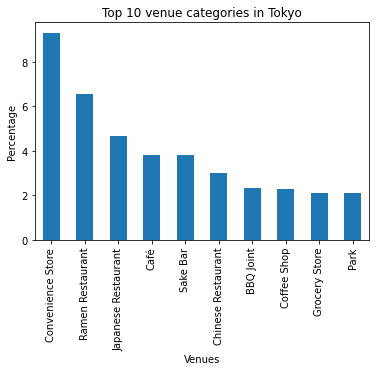

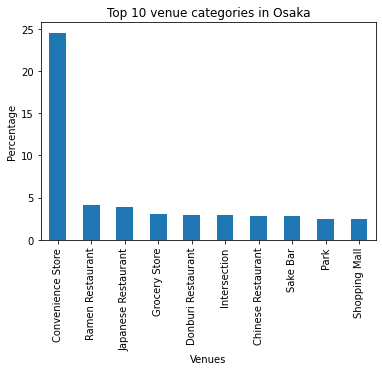

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

tokyo_lank = tokyo_lank*100
tokyo_lank.plot(kind='bar')
plt.title('Top 10 venue categories in Tokyo')
plt.xlabel('Venues')
plt.ylabel('Percentage')
plt.show()

osaka_lank = osaka_lank*100
osaka_lank.plot(kind='bar')
plt.title('Top 10 venue categories in Osaka')
plt.xlabel('Venues')
plt.ylabel('Percentage')
plt.show()

It looks like Japanese cities are occupied by a convenience stores, especially in Osaka city (about 25% is convenience stores!). Another interesting characteristic is 2nd place Ramen restaurant for both Tokyo and Osaka. Believe me, Japanese Ramen is amazing!

## 4.8 Create a new dataframe which contains top 10 venues categories
Define a function that returns top venues from input DataFrame.

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a new DataFrame called **tokyo_venues_sorted** and **osaka_venues_sorted** that have top 10 venues.

In [1]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Venue'.format(ind+1))

# create a new dataframe
tokyo_venues_sorted = pd.DataFrame(columns=columns)
tokyo_venues_sorted['District'] = tokyo_grouped['District']

for ind in np.arange(tokyo_grouped.shape[0]):
    tokyo_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

tokyo_venues_sorted.head()

NameError: name 'np' is not defined

In [ ]:
# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Venue'.format(ind+1))

# create a new dataframe
osaka_venues_sorted = pd.DataFrame(columns=columns)
osaka_venues_sorted['District'] = osaka_grouped['District']

for ind in np.arange(osaka_grouped.shape[0]):
    osaka_venues_sorted.iloc[ind, 1:] = return_most_common_venues(osaka_grouped.iloc[ind, :], num_top_venues)

osaka_venues_sorted.head()

## 4.9 Run k-means clustering with grouped DataFrame
Set number of clusters to 3, it's appropriate number since the number of districts is only 23 for Tokyo and 24 for Osaka.

In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

Create new DataFrame named **tokyo_grouped_clustering** and **osaka_grouped_clustering** which drop District colomn then apply k-means clustering.

In [ ]:
tokyo_grouped_clustering = tokyo_grouped.drop('District', 1)

# run k-means clustering
tokyo_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
tokyo_kmeans.labels_

In [ ]:
osaka_grouped_clustering = osaka_grouped.drop('District', 1)

# run k-means clustering
osaka_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(osaka_grouped_clustering)

# check cluster labels generated for each row in the dataframe
osaka_kmeans.labels_

Build final DataFrame.

In [ ]:
# Merge tokyo_grouped with tokyo to add latitude/longitude for each neighborhood
tokyo_venues_sorted.insert(0, 'Cluster Labels', tokyo_kmeans.labels_)
tokyo_merged = tokyo
tokyo_merged = tokyo_merged.join(tokyo_venues_sorted.set_index('District'), on='District')
tokyo_merged.head()

In [ ]:
# Merge osaka_grouped with osaka to add latitude/longitude for each neighborhood
osaka_venues_sorted.insert(0, 'Cluster Labels', osaka_kmeans.labels_)
osaka_merged = osaka
osaka_merged = osaka_merged.join(osaka_venues_sorted.set_index('District'), on='District')
osaka_merged.head()

## 4.10 Create clusters map

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# create map
tokyo_clusters = folium.Map(location=[tokyo_latitude, tokyo_longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], tokyo_merged['Longtitude'], tokyo_merged['District'], tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(tokyo_clusters)
       
tokyo_clusters

In [ ]:
# create map
osaka_clusters = folium.Map(location=[osaka_latitude, osaka_longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(osaka_merged['Latitude'], osaka_merged['Longtitude'], osaka_merged['District'], osaka_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(osaka_clusters)
       
osaka_clusters

## 4.11 Analyze Clusters

In [ ]:
# Tokyo Cluster 1
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 0, tokyo_merged.columns[[0] + list(range(4, tokyo_merged.shape[1]))]]

In [ ]:
# Tokyo Cluster 2
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 1, tokyo_merged.columns[[0] + list(range(4, tokyo_merged.shape[1]))]]

In [ ]:
# Tokyo Cluster 3
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 2, tokyo_merged.columns[[0] + list(range(4, tokyo_merged.shape[1]))]]

In [ ]:
# Tokyo Cluster 4
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 3, tokyo_merged.columns[[0] + list(range(4, tokyo_merged.shape[1]))]]

In [ ]:
# Tokyo Cluster 5
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 4, tokyo_merged.columns[[0] + list(range(4, tokyo_merged.shape[1]))]]

In [ ]:
# Osaka Cluster 1
osaka_merged.loc[osaka_merged['Cluster Labels'] == 0, osaka_merged.columns[[0] + list(range(4, osaka_merged.shape[1]))]]

In [ ]:
# Osaka Cluster 2
osaka_merged.loc[osaka_merged['Cluster Labels'] == 1, osaka_merged.columns[[0] + list(range(4, osaka_merged.shape[1]))]]

In [ ]:
# Osaka Cluster 3
osaka_merged.loc[osaka_merged['Cluster Labels'] == 2, osaka_merged.columns[[0] + list(range(4, osaka_merged.shape[1]))]]

In [ ]:
# Osaka Cluster 4
osaka_merged.loc[osaka_merged['Cluster Labels'] == 3, osaka_merged.columns[[0] + list(range(4, osaka_merged.shape[1]))]]

In [ ]:
# Osaka Cluster 5
osaka_merged.loc[osaka_merged['Cluster Labels'] == 4, osaka_merged.columns[[0] + list(range(4, osaka_merged.shape[1]))]]

## 4.12 Run k-means clustering with mixing Tokyo and Osaka DataFrame

In [ ]:
# Append Osaka data to Tokyo data
mixed_grouped_clustering = tokyo_grouped_clustering.append(osaka_grouped_clustering)
mixed_grouped_clustering.reset_index(inplace=True, drop=True)
mixed_grouped_clustering.fillna(0, inplace=True)

# run k-means clustering
mixed_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mixed_grouped_clustering)

# check cluster labels generated for each row in the dataframe
mixed_kmeans.labels_

In [ ]:
# Merge tokyo_grouped with tokyo to add latitude/longitude for each neighborhood
tokyo_venues_sorted2 = tokyo_venues_sorted.drop('Cluster Labels', axis=1) # Drop old 'Cluster Labels'
tokyo_venues_sorted2.insert(0, 'Cluster Labels', mixed_kmeans.labels_[0:23]) # Attach new 'Cluster Labels'
tokyo_merged2 = tokyo
tokyo_merged2 = tokyo_merged2.join(tokyo_venues_sorted2.set_index('District'), on='District')
tokyo_merged2.head()

In [ ]:
# Merge tokyo_grouped with tokyo to add latitude/longitude for each neighborhood
osaka_venues_sorted2 = osaka_venues_sorted.drop('Cluster Labels', axis=1) # Drop old 'Cluster Labels'
osaka_venues_sorted2.insert(0, 'Cluster Labels', mixed_kmeans.labels_[23:47]) # Attach new 'Cluster Labels'
osaka_merged2 = osaka
osaka_merged2 = osaka_merged2.join(osaka_venues_sorted2.set_index('District'), on='District')
osaka_merged2.head()

## 4.13 Create clusters map for mixed k-means

In [ ]:
# create map
tokyo_clusters = folium.Map(location=[tokyo_latitude, tokyo_longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_merged2['Latitude'], tokyo_merged2['Longtitude'], tokyo_merged2['District'], tokyo_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(tokyo_clusters)
       
tokyo_clusters

In [ ]:
# create map
osaka_clusters = folium.Map(location=[osaka_latitude, osaka_longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(osaka_merged2['Latitude'], osaka_merged2['Longtitude'], osaka_merged2['District'], osaka_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(osaka_clusters)

osaka_clusters

## 4.14 Analyze Clusters

In [ ]:
# Tokyo Cluster 1
tokyo_merged2.loc[tokyo_merged2['Cluster Labels'] == 0, tokyo_merged2.columns[[0] + list(range(4, tokyo_merged2.shape[1]))]]

In [ ]:
# Osaka Cluster 1
osaka_merged2.loc[osaka_merged2['Cluster Labels'] == 0, osaka_merged2.columns[[0] + list(range(4, osaka_merged2.shape[1]))]]

In [ ]:
# Tokyo Cluster 2
tokyo_merged2.loc[tokyo_merged2['Cluster Labels'] == 1, tokyo_merged2.columns[[0] + list(range(4, tokyo_merged2.shape[1]))]]

In [ ]:
# Osaka Cluster 2
osaka_merged2.loc[osaka_merged2['Cluster Labels'] == 1, osaka_merged2.columns[[0] + list(range(4, osaka_merged2.shape[1]))]]

In [ ]:
# Tokyo Cluster 3
tokyo_merged2.loc[tokyo_merged2['Cluster Labels'] == 2, tokyo_merged2.columns[[0] + list(range(4, tokyo_merged2.shape[1]))]]

In [ ]:
# Osaka Cluster 3
osaka_merged2.loc[osaka_merged2['Cluster Labels'] == 2, osaka_merged2.columns[[0] + list(range(4, osaka_merged2.shape[1]))]]